Aim: predicting the selling price of the car based on various features of the cars, including the present price of the cars.

In [1]:
#importing the libraries
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
import pickle
warnings.filterwarnings('ignore')

Loading the exploratory data set

In [3]:
df_eda = pickle.load(open('C:\\Users\\rakhi\\OneDrive\\Desktop\\Car Dekho Dataset\\models\\ExplorataryDataAnalysis.pkl','rb'))
df_eda.head()

,year,selling_price,km_driven,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,1,0,0,1,0,1,0,0,0,0
1,2014,370000,120000,1,0,0,1,0,1,0,1,0,0
2,2006,158000,140000,0,0,1,1,0,1,0,0,0,1
3,2010,225000,127000,1,0,0,1,0,1,0,0,0,0
4,2007,130000,120000,0,0,1,1,0,1,0,0,0,0


In [4]:
#independent features and dependent features
X=df_eda.drop(columns='selling_price',axis=1)
y=df_eda['selling_price']

In [5]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
print(X_train)
print(X_test)
print(y_train)

      year  km_driven  fuel_Diesel  fuel_LPG  fuel_Petrol  \
5501  2011      60000            1         0            0   
2311  2013     184000            1         0            0   
2629  2011      90000            0         0            1   
7438  2013     120000            1         0            0   
291   2017      35000            0         0            1   
...    ...        ...          ...       ...          ...   
8105  2004     120000            0         0            1   
5295  2018      15000            1         0            0   
4051  2005     125000            0         0            1   
235   2010     110000            1         0            0   
5259  2018      10000            1         0            0   

      seller_type_Individual  seller_type_Trustmark Dealer  \
5501                       1                             0   
2311                       1                             0   
2629                       1                             0   
7438               

In [6]:
#standarization of the data
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [7]:
#machine learning algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

Building a linear regression model

coefficients: [ 159658.45866422  -99911.31127965  176292.89726027    8379.64794872
   -9604.9600421  -121411.98283906  -68316.36043019 -369890.44156839
    7622.19692182  -12932.68778985   84598.25407317   10125.74077503]
intercept: 635958.7409335717
AxesSubplot(0.125,0.125;0.775x0.755)
r2_score: 0.5137668597632705
Mean Absolute Error: 317863.6022849452
Mean Squared Error: 338522807168.47076
Root Mean Square Error: 581827.1282507123
accuracy score of training data: 0.5043986519335371
accuracy score of testing data: 0.5137668597632705


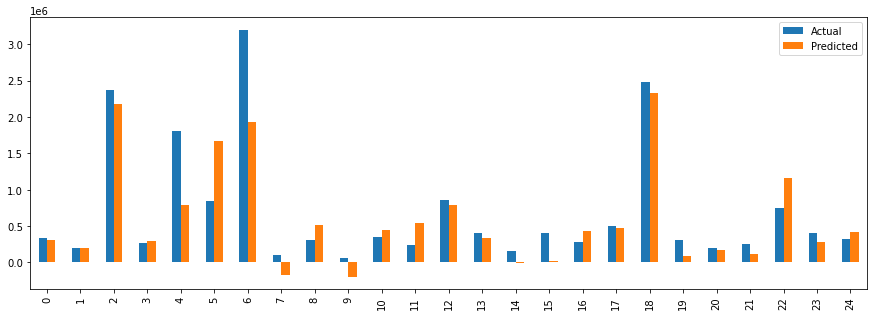

In [8]:
#linear regression model
lin_reg=LinearRegression()
#building the algorithm
lin_reg.fit(X_train, y_train)

#getting coefficients and intercepts
print('coefficients:',lin_reg.coef_)
print('intercept:',lin_reg.intercept_)

#predicting on the test data
y_pred_lin=lin_reg.predict(X_test)

#compare the actual output values and predicted values
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_lin})
df.reset_index(inplace=True,drop=True)

#showing the difference between the actual and predicted values
df1=df.head(25)
print(df1.plot(kind='bar', figsize=(15,5)))

#calculate the accuracy
from sklearn import metrics

print('r2_score:',metrics.r2_score(y_test,y_pred_lin))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred_lin))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred_lin))
print('Root Mean Square Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_lin)))

#training data
print('accuracy score of training data:',lin_reg.score(X_train,y_train))
print('accuracy score of testing data:',lin_reg.score(X_test,y_test))

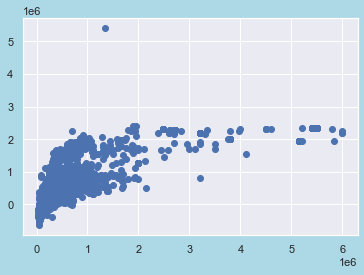

In [9]:
sns.set(rc={'figure.facecolor':'lightblue'})
plt.scatter(y_test,y_pred_lin)

In [10]:
#building a LR model using statsmodels Ordinary least-squares (OLS) models
#!pip install statsmodels
import statsmodels.api as sm

y=df_eda['selling_price']
X=df_eda.drop(['selling_price'],axis=1)

X_constant=sm.add_constant(X)
model=sm.OLS(y,X_constant).fit()

model.predict(X_constant)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     689.2
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:28:56   Log-Likelihood:            -1.1675e+05
No. Observations:                7958   AIC:                         2.335e+05
Df Residuals:                    7945   BIC:                         2.336e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Regularized Regression

Ridge Regression Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model. This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients.
Loss function = OLS + alpha * summation (squared coefficient values)

In the above loss function, alpha is the parameter we need to select. A low alpha value can lead to over-fitting, whereas a high alpha value can lead to under-fitting.

Instead of arbitrarily choosing alpha value ,it would be better to use cross-validation to choose the tuning parameter alpha. We can do this using the cross-validated ridge regression function, RidgeCV()

In [12]:
#building ridgeregression model
from sklearn.linear_model import Ridge, RidgeCV

alphas=10**np.linspace(10,-2,100)*0.5

ridge_cv= RidgeCV(alphas=alphas,normalize=True)
ridge_cv.fit(X_train,y_train)
print(ridge_cv.alpha_)

#ridge regression L2 regularization
ridge=Ridge(alpha=ridge_cv.alpha_,normalize=True)
ridge.fit(X_train,y_train)

print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,ridge.predict(X_test))))
print('r2_score:',r2_score(y_test,ridge.predict(X_test)))

0.005
Root Mean Squared Error: 581921.1370704225
r2_score: 0.5136097206605541


In [13]:
#ridge regression L2 regularization
ridge=Ridge(alpha=ridge_cv.alpha_,normalize=True)
ridge.fit(X_train,y_train)

y_predr=ridge.predict(X_test)

print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_predr)))
print('r2_score:',r2_score(y_test,y_predr))

Root Mean Squared Error: 581921.1370704225
r2_score: 0.5136097206605541


Lasso Regression Lasso regression, or the Least Absolute Shrinkage and Selection Operator, is also a modification of linear regression. In Lasso, the loss function is modified to minimize the complexity of the model by limiting the sum of the absolute values of the model coefficients (also called the l1-norm).

The loss function for Lasso Regression can be expressed as below:

Loss function = OLS + alpha * summation (absolute values of the magnitude of the coefficients)

We now ask whether the lasso can yield either a more accurate or a more interpretable model than ridge regression. In order to fit a lasso model, we'll use the Lasso() function; however, this time we'll need to include the argument max_iter = 10000. Other than that change, we proceed just as we did in fitting a ridge model:

In [14]:
#building lasso regression model
from sklearn.linear_model import Lasso,LassoCV

#without alpha and cv parameters
lasso=Lasso(max_iter=10000,normalize=True)
lasso.fit(X_train,y_train)

y_predl=lasso.predict(X_test)
print(lasso.coef_)

#with CV
lasso_cv=LassoCV(alphas=None,cv=10,max_iter=100000,normalize=True)
lasso_cv.fit(X_train,y_train)

lasso.set_params(alpha=lasso_cv.alpha_)
lasso.fit(X_train,y_train)

y_predll=lasso.predict(X_test)
print(lasso.coef_)
print('r2_score:',r2_score(y_test,y_predll))

[ 159587.92462401  -99830.4387744   177185.37638106    8433.21167928
   -8640.23541567 -121315.61406182  -68206.77529437 -369855.02373255
    7517.01447952  -12941.17051204   84533.33529859    9998.87189999]
[ 158267.42526609  -98141.53041797  169211.19652817    5970.50269799
  -14866.59303446 -119730.41444255  -66261.86817179 -369321.86873624
    5490.5186411   -13102.17275381   83332.56369981    7664.68626807]
r2_score: 0.5136354465612107


In [15]:
#DecisionTreeRegressor
from sklearn.tree import plot_tree

dtr=DecisionTreeRegressor(max_depth=60, min_samples_leaf=10,min_samples_split=10)
dtr.fit(X_train,y_train)

y_pred_dtr=dtr.predict(X_test)

print('r2_score:',metrics.r2_score(y_test,y_pred_dtr))

r2_score: 0.5583779540047751


In [16]:
#Random forest Regressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rf=rfr.predict(X_test)
print(metrics.r2_score(y_test,y_pred_rf))

#with best prameters
rfr_best_model=RandomForestRegressor(n_estimators=300,
                                     max_features='sqrt',
                                     min_samples_split=10,min_samples_leaf=1,max_depth=30)
rfr_best_model.fit(X_train,y_train)
y_pred_rfr=rfr_best_model.predict(X_test)
print(metrics.r2_score(y_test,y_pred_rfr))
#If "sqrt", then max_features=sqrt(n_features)

0.6753908404680973
0.7451396334904743


In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingRegressor

#voting classifier
vote = VotingRegressor(estimators=[('LR', lin_reg), ('RFR', rfr), ('DTR', dtr)])
vote.fit(X_train, y_train)
print(vote.estimators_)
y_pred_voting = vote.predict(X_test)

#accuracy score
score = metrics.r2_score(y_pred_voting, y_test)

cv = KFold(n_splits=10, random_state=1, shuffle=True)

labels = ['Linear Regression', 'Random Forest Regressor', 'Decision Tree Regressor']

for classifier, label in zip([lin_reg, rfr, dtr], labels):
    scores = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=cv)
    print('accuracy:',scores.mean(), scores.std(), label)

[LinearRegression(), RandomForestRegressor(), DecisionTreeRegressor(max_depth=60, min_samples_leaf=10, min_samples_split=10)]
accuracy: 0.49440720885963996 0.05574469454463369 Linear Regression
accuracy: 0.7561402928174952 0.08242238120796455 Random Forest Regressor
accuracy: 0.7479654148267596 0.08629339290766161 Decision Tree Regressor


from the observations, we can coclude that Random Forest Regressor is the best model among other models for our car price prediction.

Random Forest is an ensemble learning based regression model. It uses a model called decision tree, multiple decision trees to generate the ensemble model which collectively produces a prediction.

The benefit of this model is that the trees are produced in parallel and are relatively uncorrelated, producing good results.

In [18]:
with open('C:\\Users\\rakhi\\OneDrive\\Desktop\\Car Dekho Dataset\\models\\best_model_car_prediction.pkl', 'wb') as file:
    pickle.dump(rfr_best_model, file)

#loading a pickle file from models directory
model_file=pickle.load(open('C:\\Users\\rakhi\\OneDrive\\Desktop\\Car Dekho Dataset\\models\\best_model_car_prediction.pkl', 'rb'))